cancer Prediction 
Description: A dataset containing information about the potential relationship between lifestyle habits (smoking, drinking, biking, walking, jogging) and the probability of developing cancer.

# Insert nececary modules and Liberary

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


# Explore Data

In [51]:
df = pd.read_csv('cancer-probabilities.csv')

In [52]:
df.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,NaN,NaN,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


In [53]:
df.tail()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
45,46,Heavy,Frequent,Low,Low,Low,0.80
46,47,Moderate,Occasional,Medium,Medium,Medium,0.40
47,48,NaN,NaN,High,High,High,0.01
48,49,Heavy,Frequent,Low,Low,Low,0.75
49,50,Moderate,Occasional,Medium,Medium,Medium,0.35


In [54]:
df.shape

(50, 7)

In [55]:
df.columns

Index(['Sr No.', 'Smoking Habit', 'Drinking Habit', 'Biking Habit',
       'Walking Habit', 'Jogging Habit', 'Probability of Cancer'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          34 non-null     object 
 2   Drinking Habit         34 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [57]:
df.isnull().sum()

Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64

In [58]:
df['Smoking Habit'].unique()

array(['Heavy', 'Occasional', nan, 'Moderate'], dtype=object)

In [59]:
df['Smoking Habit'] = df['Smoking Habit'].replace({np.nan:'No Smokin'})

In [60]:
df['Drinking Habit'].unique()

array(['Frequent', 'Moderate', nan, 'Occasional'], dtype=object)

In [61]:
df['Drinking Habit'] = df['Drinking Habit'].replace({np.nan:'No Drinking'})

In [62]:
df.isnull().sum()

Sr No.                   0
Smoking Habit            0
Drinking Habit           0
Biking Habit             0
Walking Habit            0
Jogging Habit            0
Probability of Cancer    0
dtype: int64

In [63]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No.,50.0,25.5000,14.577380,1.00,13.25,25.500,37.75,50.0
Probability of Cancer,50.0,0.4072,0.325501,0.01,0.05,0.375,0.75,0.9


# Transform Data

In [64]:
le = LabelEncoder()
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

for i in range(0,obj.shape[1]):
    obj.iloc[:,i] = le.fit_transform(obj.iloc[:,i])
obj = obj.astype("int")
df = pd.concat([obj,num], axis=1)

In [65]:
df.sample()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Sr No.,Probability of Cancer
22,1,3,2,2,2,23,0.4


In [66]:
df.head()

,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Sr No.,Probability of Cancer
0,0,0,1,1,1,1,0.8
1,3,1,0,0,0,2,0.2
2,2,2,0,0,0,3,0.1
3,0,0,1,1,1,4,0.9
4,1,3,2,2,2,5,0.4


In [67]:
threshold = .5
df['Probability of Cancer'] = (df['Probability of Cancer'] > threshold).astype(int)

# Analysis Data

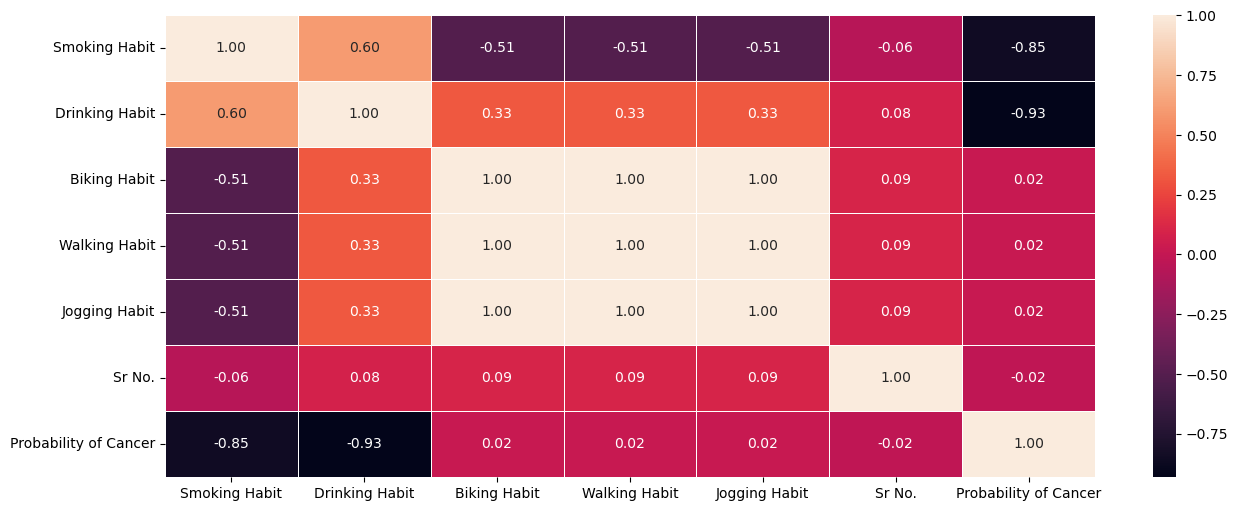

In [68]:
df_c = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_c,annot=True,fmt='0.2f',linewidth=0.5)
plt.show()

In [69]:
df['Smoking Habit'].value_counts()

Smoking Habit
0    17
2    16
1    16
3     1
Name: count, dtype: int64

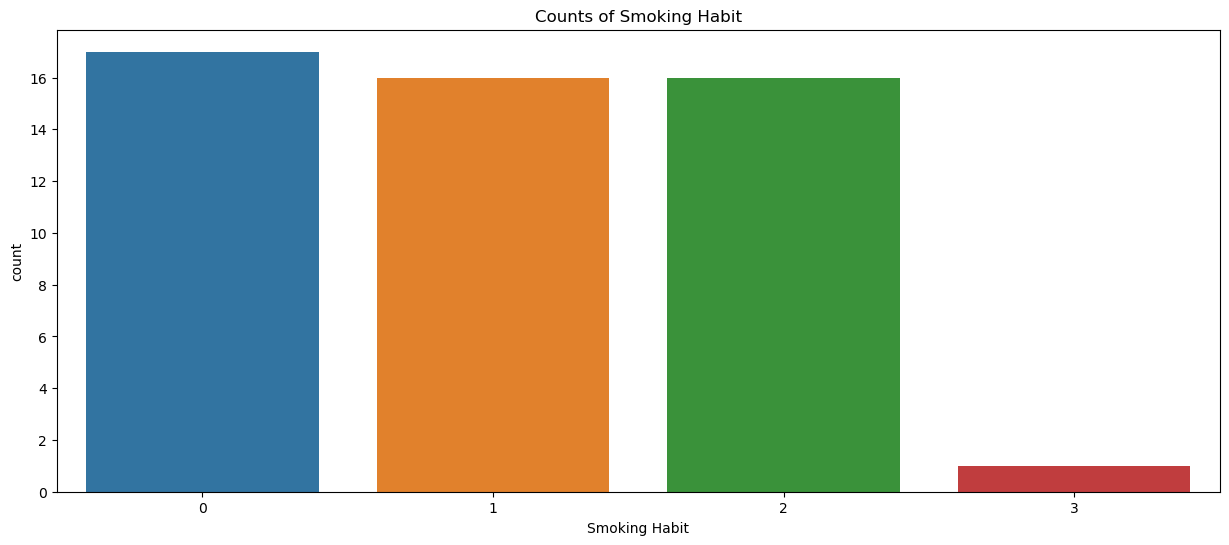

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Smoking Habit')
plt.title('Counts of Smoking Habit')
plt.show()

In [71]:
df['Drinking Habit'].value_counts()

Drinking Habit
0    17
2    16
3    16
1     1
Name: count, dtype: int64

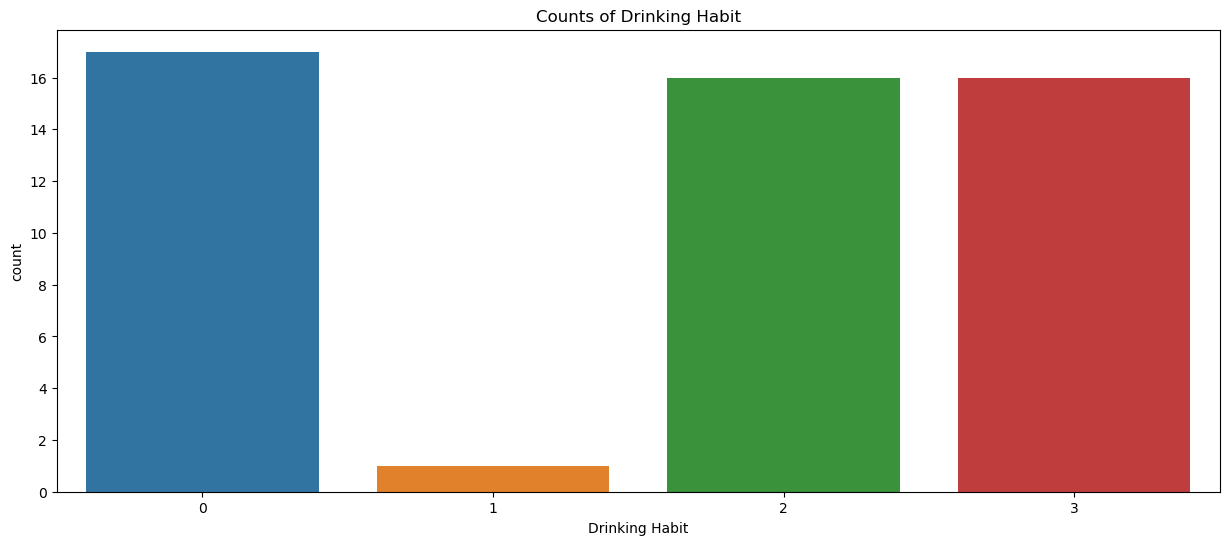

In [72]:

plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Drinking Habit')
plt.title("Counts of Drinking Habit")
plt.show()

In [73]:
df['Biking Habit'].value_counts()

Biking Habit
1    17
0    17
2    16
Name: count, dtype: int64

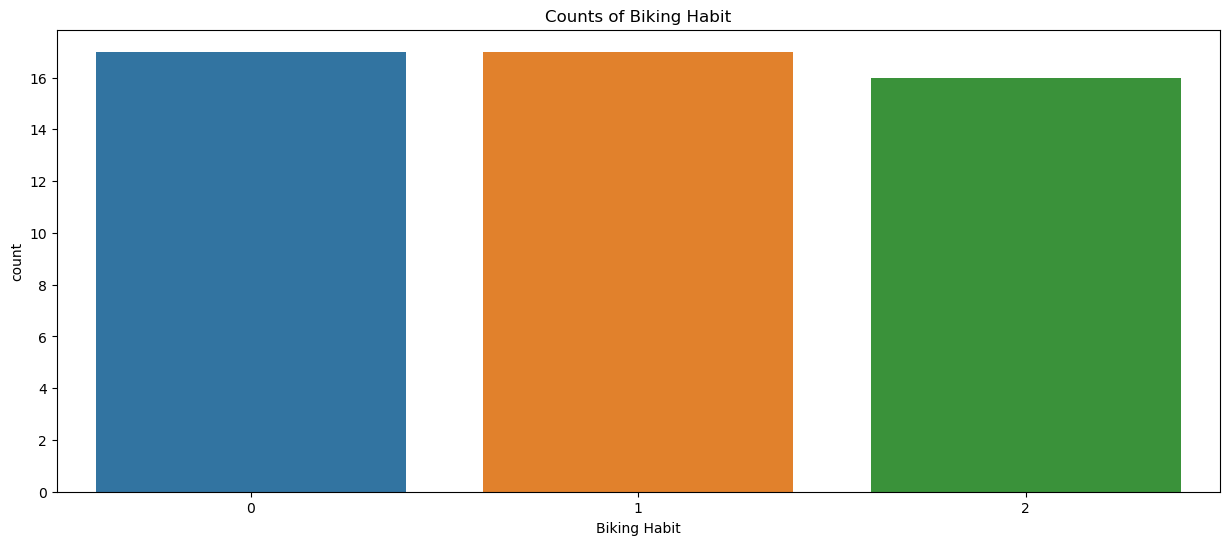

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Biking Habit')
plt.title("Counts of Biking Habit")
plt.show()

In [75]:
df['Walking Habit'].value_counts()

Walking Habit
1    17
0    17
2    16
Name: count, dtype: int64

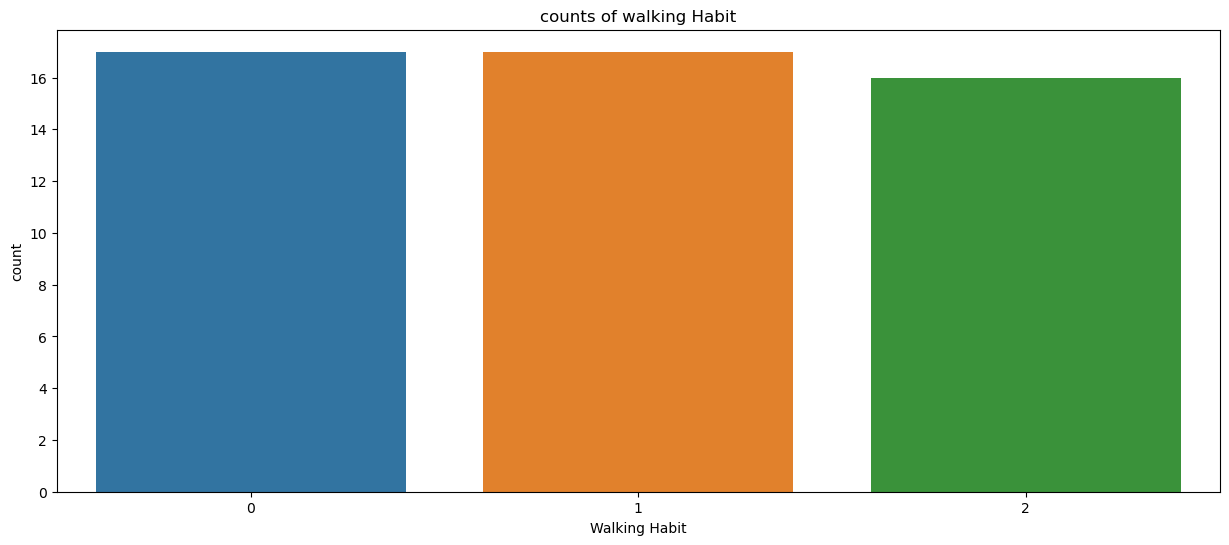

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Walking Habit')
plt.title('counts of walking Habit')
plt.show()

In [77]:
df['Jogging Habit'].value_counts()

Jogging Habit
1    17
0    17
2    16
Name: count, dtype: int64

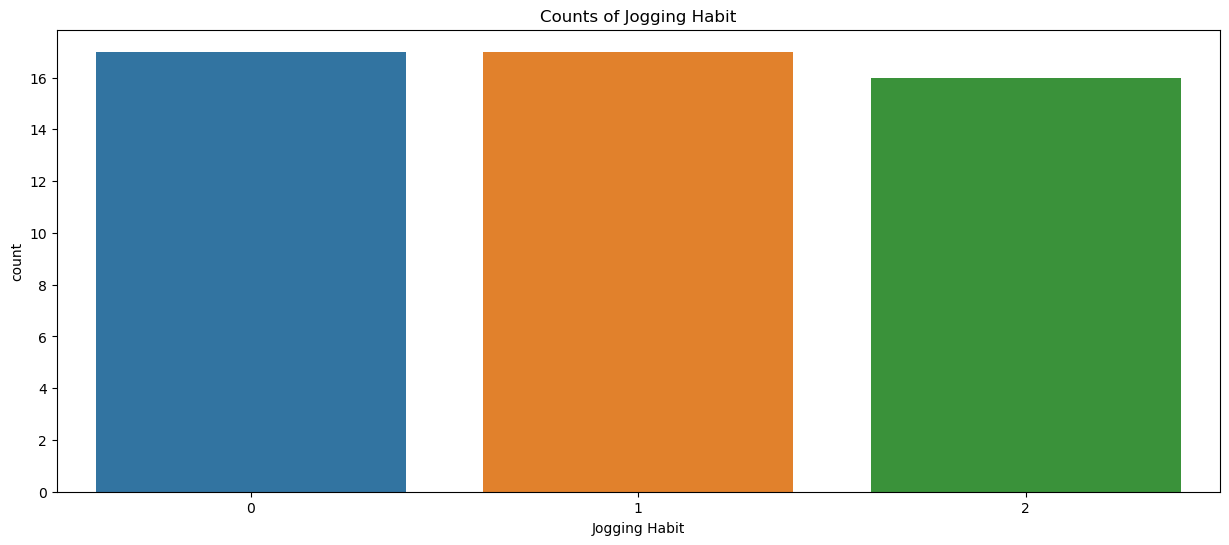

In [78]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Jogging Habit')
plt.title('Counts of Jogging Habit')
plt.show()

In [79]:
df['Probability of Cancer'].value_counts()

Probability of Cancer
0    33
1    17
Name: count, dtype: int64

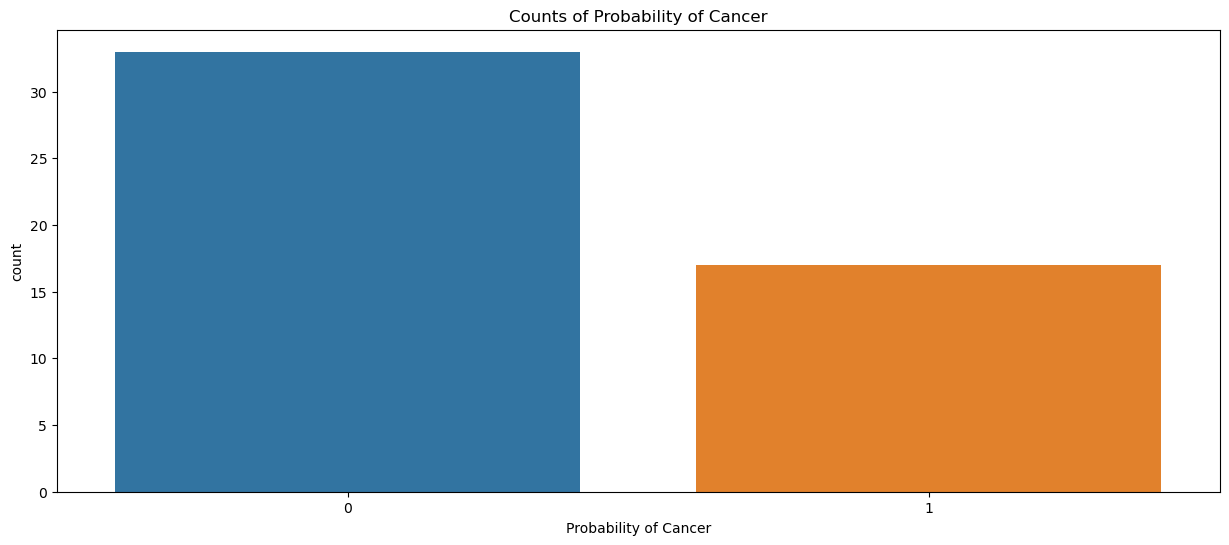

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Probability of Cancer')
plt.title('Counts of Probability of Cancer')
plt.show()

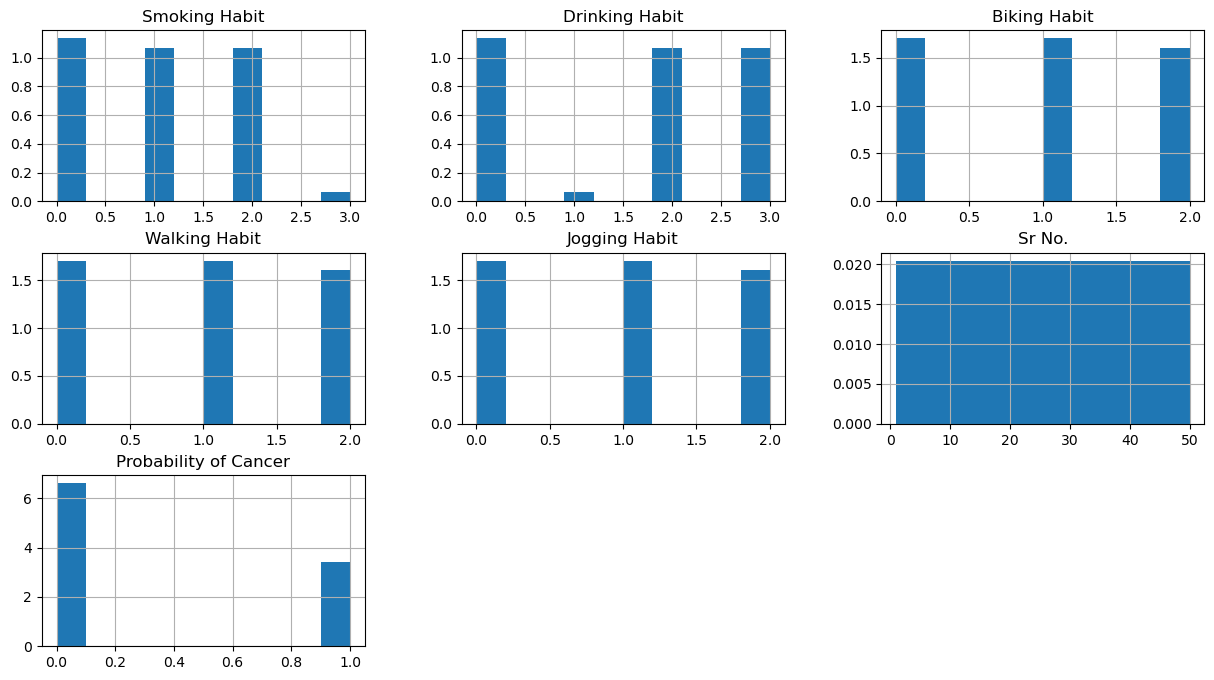

In [81]:
df.hist(figsize=(15,8),density=True)
plt.show()

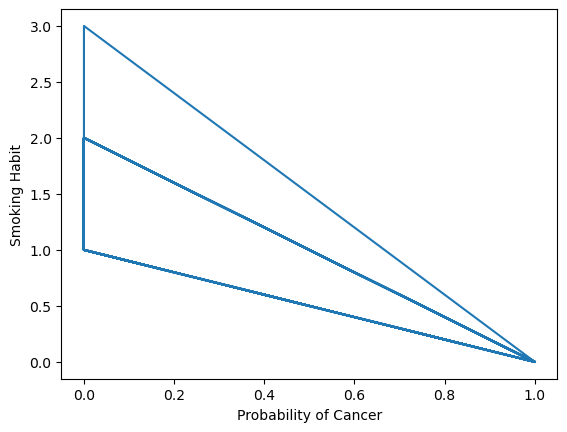

In [82]:
plt.plot(df['Probability of Cancer'], df['Smoking Habit'])
plt.xlabel('Probability of Cancer')
plt.ylabel('Smoking Habit')
plt.show()

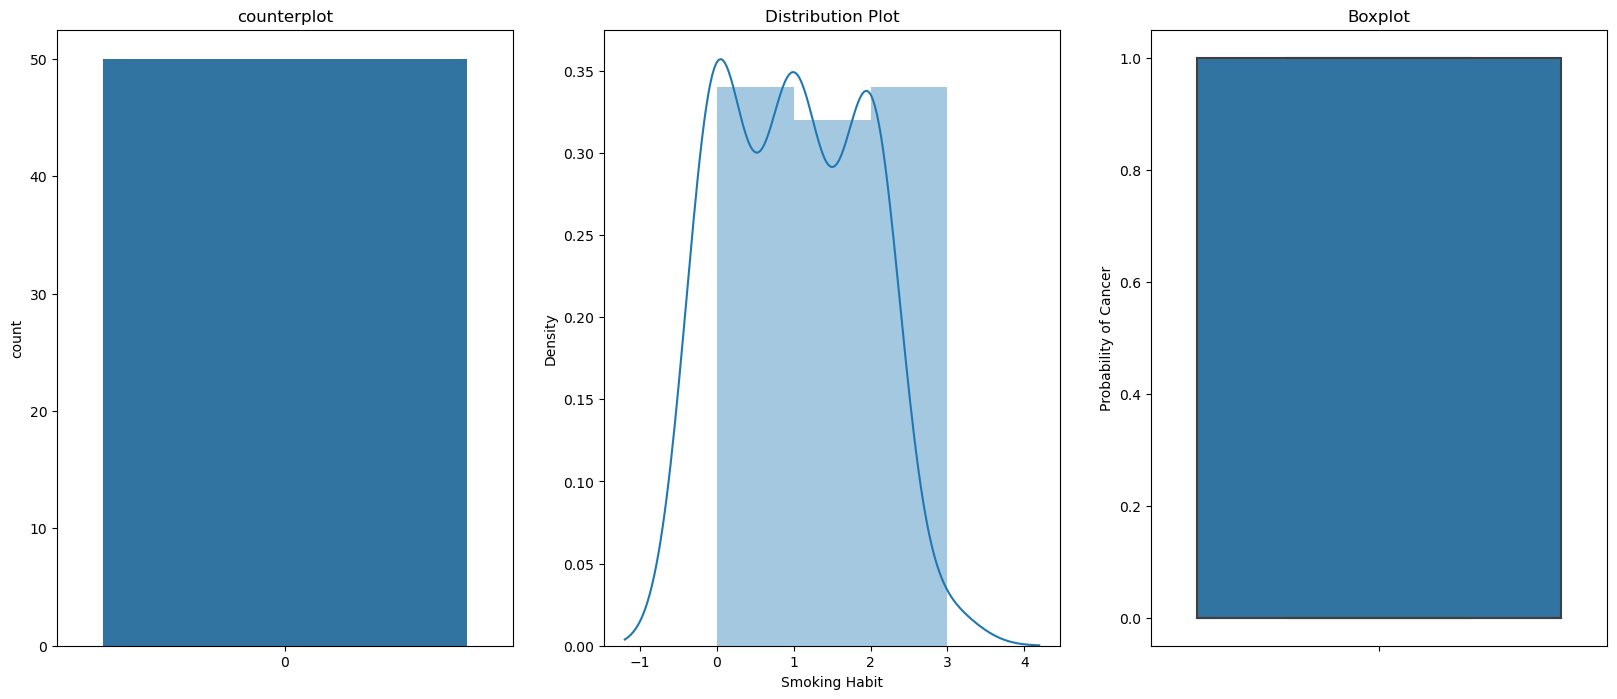

In [83]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('counterplot')
sns.countplot(df['Sr No.'])

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df['Smoking Habit'])

plt.subplot(1,3,3)
plt.title('Boxplot')
sns.boxplot(y=df['Probability of Cancer'])
plt.show()

# DETECT OUTLIERS

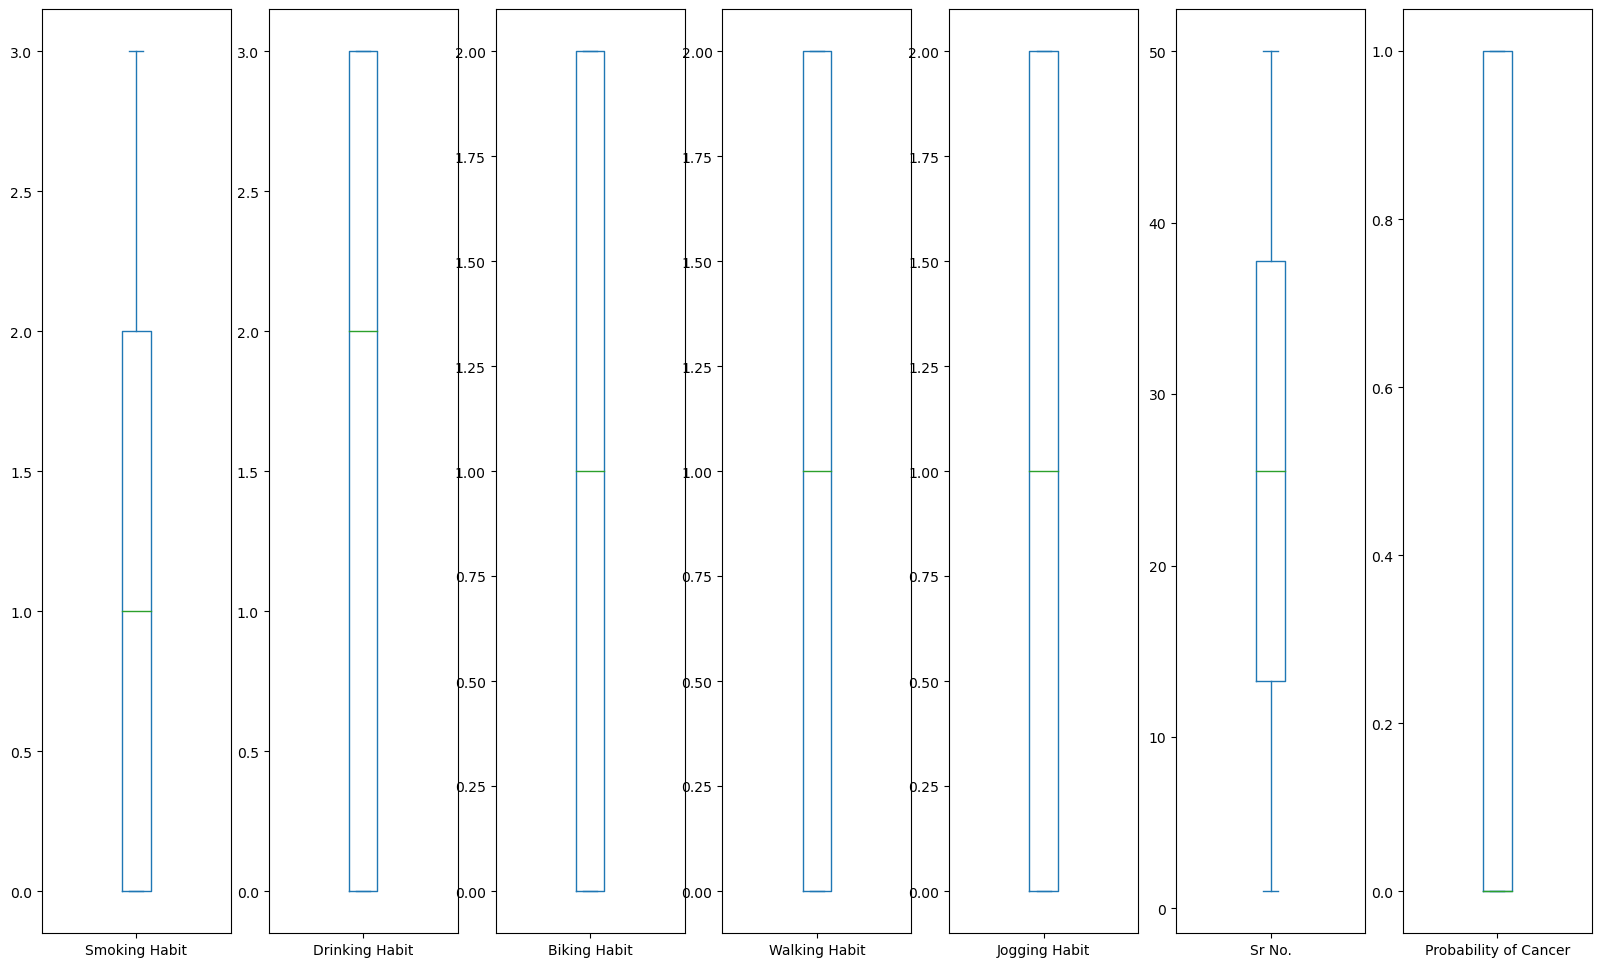

In [84]:
df.plot(kind='box', subplots=True, figsize=(20,12))
plt.show()

# Split Data

In [85]:
x=df.drop('Probability of Cancer',axis=1)
y=df['Probability of Cancer']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Model

In [87]:
Algorithm=['LogisticRegression','SVC','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','KNeighborsClassifier']
Result_1=[]

In [88]:
Model_1 = LogisticRegression()
Model_2 = SVC()
Model_3 = GradientBoostingClassifier()
Model_4 = RandomForestClassifier()
Model_5 = GaussianNB()
Model_6 = KNeighborsClassifier()

In [89]:
def Model(Model):
    Model.fit(x_train,y_train)
    pred = Model.predict(x_test)
    accuracy = accuracy_score(pred, y_test)
    print("Model is: ", Model)
    print("-----------------------------")
    print("accuracy is: ", round(accuracy*100,2), "%")
    print("-------------------------------")
    print(classification_report(pred, y_test))
    print("---------------------------------")
    sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='d', cmap='viridis')
    Result_1.append(accuracy)

# LogisticRegression()

Model is:  LogisticRegression()
-----------------------------
accuracy is:  100.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

---------------------------------


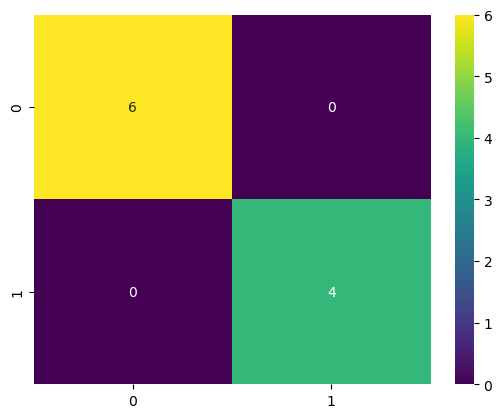

In [90]:
Model(Model_1)

# SVC()

Model is:  SVC()
-----------------------------
accuracy is:  60.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.50      0.30      0.37        10
weighted avg       1.00      0.60      0.75        10

---------------------------------


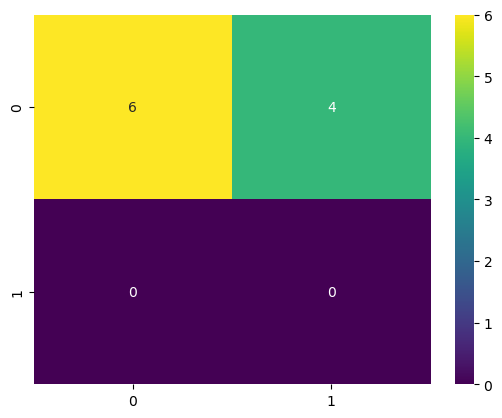

In [91]:
Model(Model_2)

# GradientBoostingClassifier()

Model is:  GradientBoostingClassifier()
-----------------------------
accuracy is:  100.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

---------------------------------


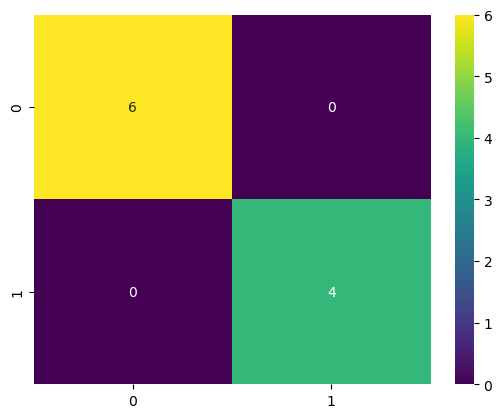

In [92]:
Model(Model_3)

# RandomForestClassifier()

Model is:  RandomForestClassifier()
-----------------------------
accuracy is:  100.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

---------------------------------


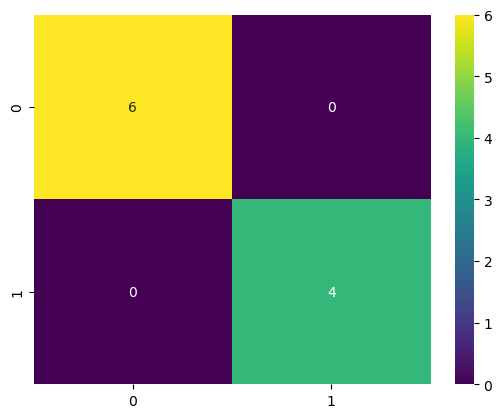

In [93]:
Model(Model_4)

# GaussianNB()

Model is:  GaussianNB()
-----------------------------
accuracy is:  100.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

---------------------------------


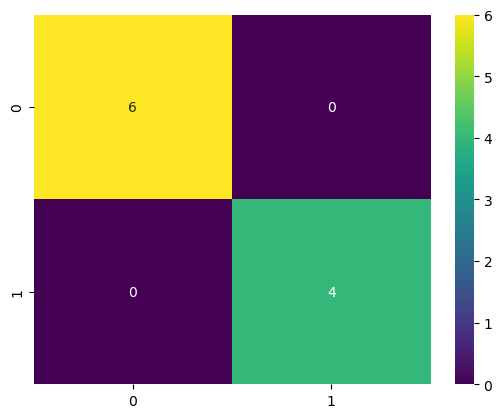

In [94]:
Model(Model_5)

# KNeighborsClassifier()

Model is:  KNeighborsClassifier()
-----------------------------
accuracy is:  60.0 %
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.50      0.30      0.37        10
weighted avg       1.00      0.60      0.75        10

---------------------------------


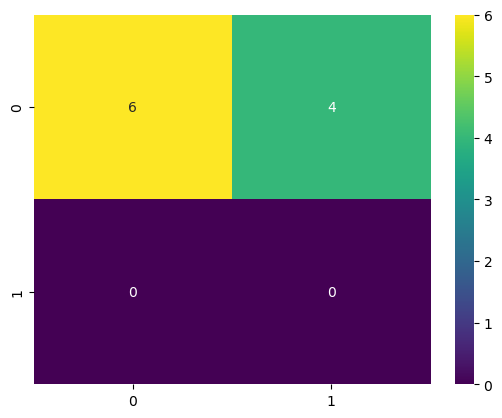

In [95]:
Model(Model_6)

In [96]:
Final = pd.DataFrame({'Algorithm':Algorithm, 'Accuracy':Result_1})
Final

,Algorithm,Accuracy
0,LogisticRegression,1.0
1,SVC,0.6
2,GradientBoostingClassifier,1.0
3,RandomForestClassifier,1.0
4,GaussianNB,1.0
5,KNeighborsClassifier,0.6


In [97]:
print(f'Max Accuracy is: {Final.Accuracy.max()*100}%')

Max Accuracy is: 100.0%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


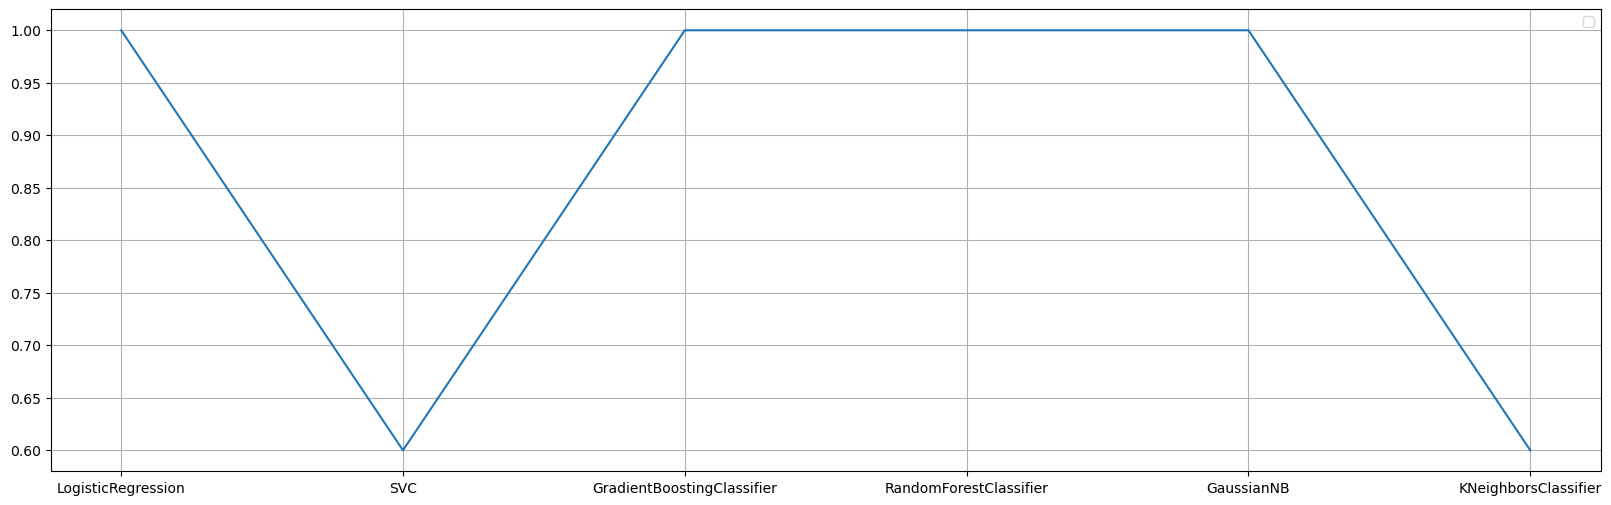

In [98]:
plt.figure(figsize=(20,6))
plt.plot(Final.Algorithm, Result_1)
plt.legend()
plt.grid()
plt.show()